In [48]:
import numpy as np
import matplotlib.pyplot as plt
import math, os

In [49]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [62]:
def sizes_of_dist(N):
    n_sizes = np.array([])
    remain = N
    while remain > 1:
        X = math.floor(remain/1.3)
        n_sizes = np.append(n_sizes, X)
        remain = remain - X
    if remain:
        n_sizes[-1] += remain
    return n_sizes, n_sizes.size

# def sizes_of_dist(N):
#     n_sizes = np.array([])
#     remain = N
#     while remain > 1:
#         X = math.floor(remain/1.1)
#         n_sizes = np.append(n_sizes, X)
#         remain = remain - X
#     if remain:
#         n_sizes[-1] += remain
#     return n_sizes, n_sizes.size

# def sizes_of_dist(N):
#     n_sizes = np.array([])
#     remain = N
#     while remain > 1:
#         X = math.floor(remain/2)
#         n_sizes = np.append(n_sizes, X)
#         remain = remain - X
#     if remain:
#         n_sizes[-1] += remain
#     return n_sizes, n_sizes.size

In [63]:
def gen_similarity_scores_not_same(sizes, chunks):
    sim_scores = np.array([])
    chunk = 1/chunks
    ranges = np.arange(0, 1, chunk)
    for i in range(chunks):
        z = np.zeros(int(sizes[i])) + np.around(ranges[i] + chunk, 2)
        # print(ranges[i], ranges[i] + chunk, sizes[i])
        sim_scores = np.append(sim_scores, z)
    sim_scores = sim_scores + chunk
    sim_scores[-1] -= chunk
    np.random.shuffle(sim_scores)
    return sim_scores

# def gen_similarity_scores_not_same(sizes, chunks):
#     sim_scores = np.array([])
#     chunk = 1/chunks
#     ranges = np.arange(0, 1, chunk)
#     for i in range(chunks):
#         z = np.zeros(int(sizes[i])) + np.around(ranges[i] + chunk, 2)
#         # print(ranges[i], ranges[i] + chunk, sizes[i])
#         sim_scores = np.append(sim_scores, z)
#     sim_scores = sim_scores + chunk
#     sim_scores[-1] -= chunk
#     np.random.shuffle(sim_scores)
#     return sim_scores

# def gen_similarity_scores_not_same(sizes, chunks):
#     sim_scores = np.array([])
#     chunk = 1/chunks
#     ranges = np.arange(0, 1, chunk)
#     for i in range(chunks):
#         z = np.zeros(int(sizes[i])) + np.around(ranges[i] + chunk, 2)
#         # print(ranges[i], ranges[i] + chunk, sizes[i])
#         sim_scores = np.append(sim_scores, z)
#     sim_scores = sim_scores + chunk
#     sim_scores[-1] -= chunk
#     np.random.shuffle(sim_scores)
#     return sim_scores, np.percentile(sim_scores, 99), np.amin(sim_scores)



In [64]:
def gen_similarity_scores_same(sizes, chunks):
    sim_scores = np.array([])
    chunk = 1/chunks
    ranges = 1 - np.arange(0, 1, chunk)
    for i in range(chunks):
        # print(ranges[i], np.abs(np.around(ranges[i] - chunk, 2)), sizes[i])
        z = np.zeros(int(sizes[i])) + np.abs(np.around(ranges[i] - chunk, 2))
        sim_scores = np.append(sim_scores, z)
    sim_scores = sim_scores - chunk
    sim_scores[-1] += chunk
    return sim_scores

# def gen_similarity_scores_same(sizes, chunks):
#     sim_scores = np.array([])
#     chunk = 1/chunks
#     ranges = 1 - np.arange(0, 1, chunk)
#     for i in range(chunks):
#         # print(ranges[i], np.abs(np.around(ranges[i] - chunk, 2)), sizes[i])
#         z = np.zeros(int(sizes[i])) + np.abs(np.around(ranges[i] - chunk, 2))
#         sim_scores = np.append(sim_scores, z)
#     sim_scores = sim_scores - chunk
#     sim_scores[-1] += chunk
#     return sim_scores

# def gen_similarity_scores_same(sizes, max_not_same, min_not_same):
#     sim_scores = np.array([])
#     for i in range(len(sizes)):
#         sim_scores = np.append(sim_scores, np.random.uniform(
#             low=min_not_same, high=max_not_same, size=int(sizes[i])))

#     return sim_scores

In [79]:
'''Plot Histogram from the sampled similarity scores for 'SAME' and 'NOT SAME'.'''
# create and save overlapping distributions.

def plot_histogram(beta_same, beta_not_same, SAME, NOT_SAME):
    # if Plots directory does not exist then create it.
    current_dir = os.getcwd()
    destination = os.path.join(current_dir, 'Distr Plots')
    if not os.path.exists(destination):
        os.makedirs(destination)

#     plt.hist(SAME, bins=10, alpha=0.5, label='same')
    plt.hist(SAME, bins='auto', alpha=0.5, label='same')
#     plt.hist(NOT_SAME, bins=10, alpha=0.5, label='not same')
    plt.hist(NOT_SAME, bins='auto', alpha=0.5, label='not same')
    plt.legend(loc='upper right')
    plt.xlabel('Similarity Score')
    plt.ylabel('Number of pairs')
    plt.xlim(0.0, 1.0)
    plt.tight_layout()
#     plt.ylim(0, 2000000)
#     plt.title(f'Beta(Same) = {beta_same}, Beta(Not-Same) = {beta_not_same}')
#     print(os.path.join(destination, str(beta_same) + str(beta_not_same)))
    plt.savefig(os.path.join(destination, str(beta_same) + ', ' + str(beta_not_same) + '.png'))
#     plt.savefig(os.path.join(destination, 'test'))
    plt.show()

In [66]:
# N1 = 27000
N1 = 16676471
# N2 = 153000
N2 = 95816029
sizes1, chunks1 = sizes_of_dist(N1)
sizes2, chunks2 = sizes_of_dist(N2)
not_same = gen_similarity_scores_not_same(sizes2, chunks2)
print('------')
same = gen_similarity_scores_same(sizes1, chunks1)
print('------')

------
------


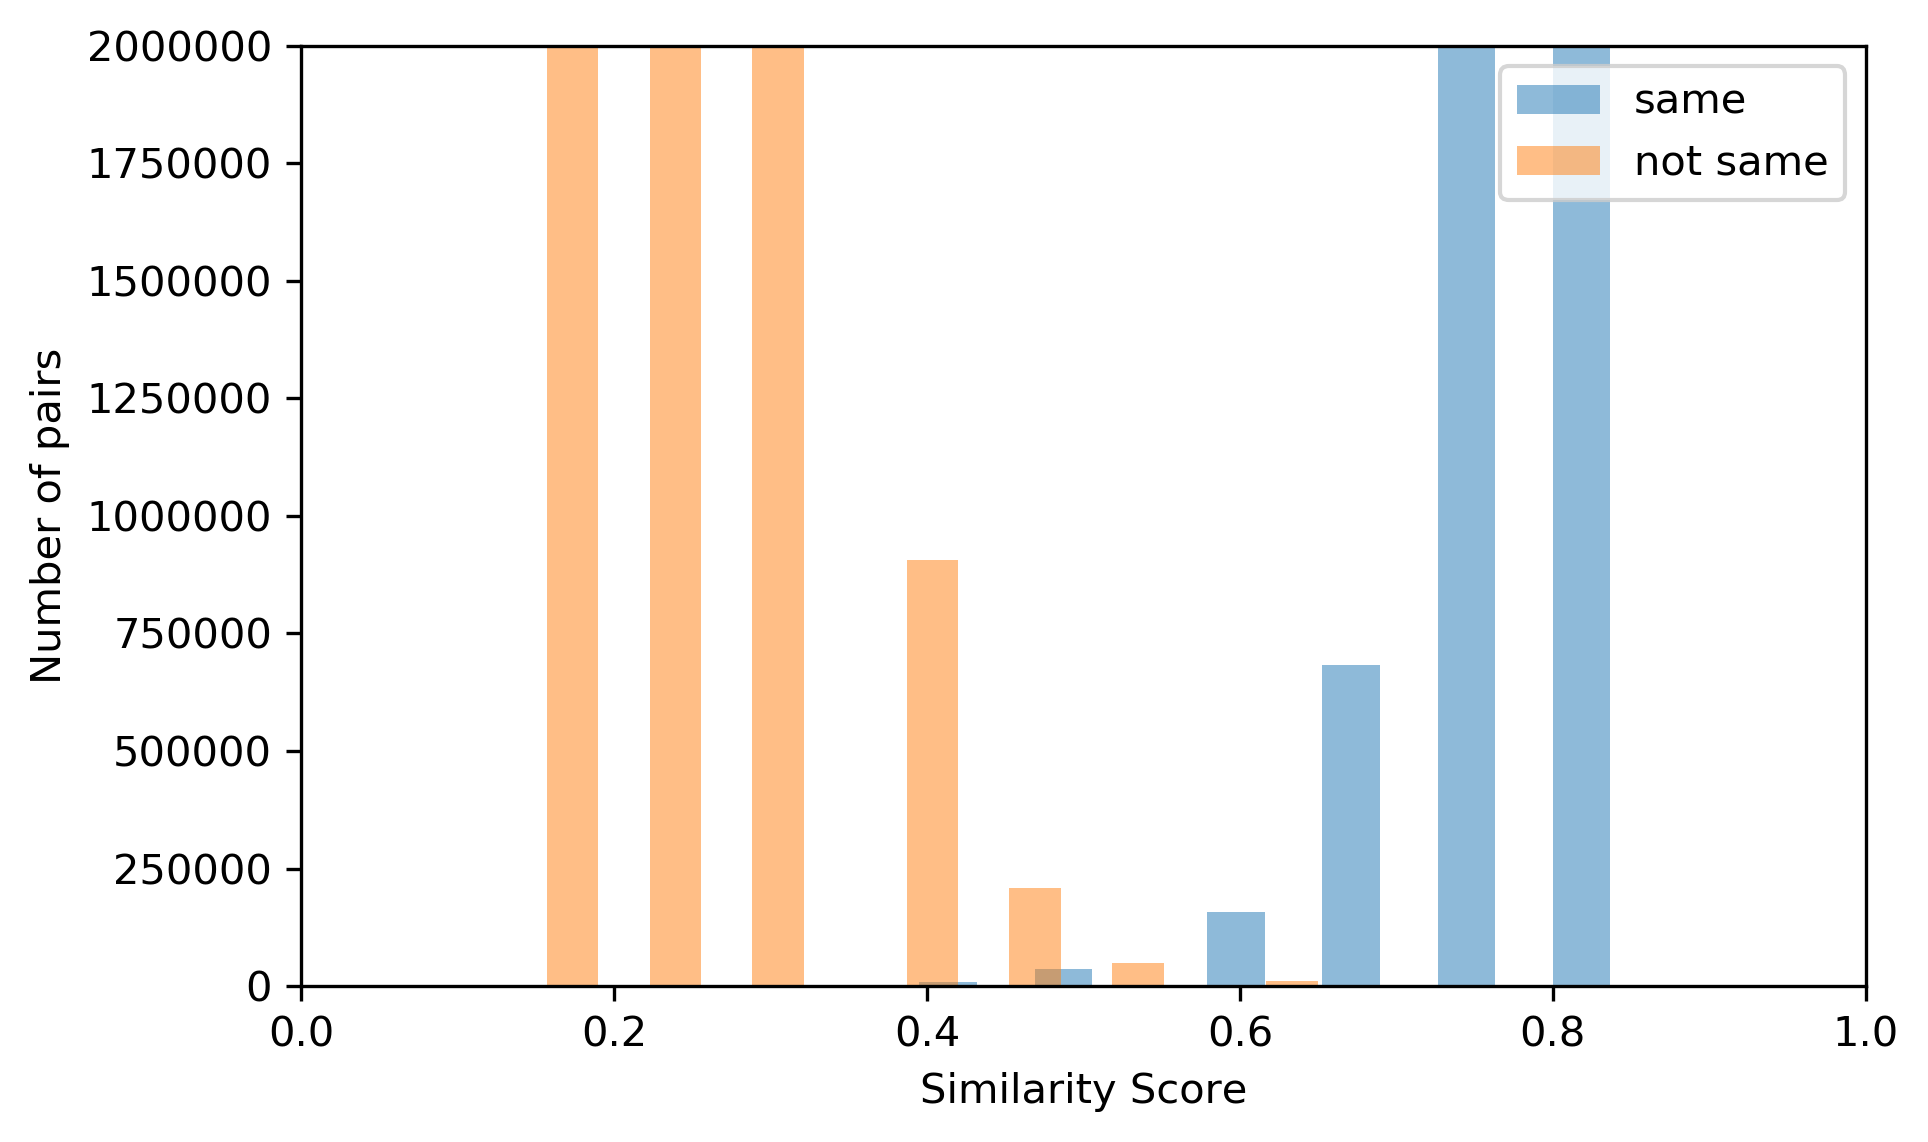

In [80]:
plot_histogram('z','z', same, not_same)

In [11]:
import networkx as nx

In [15]:
G = nx.Graph()

In [16]:
G.add_nodes_from(list(range(1, 10)))

In [17]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9))

In [18]:
edge_list = [(1,2),(1,4),(1,3),(2,3),(2,5),(3,5),(4,5),(4,8),(7,6),(7,8),(7,9)]

In [19]:
G.add_edges_from(edge_list)

In [20]:
G.edges

EdgeView([(1, 2), (1, 4), (1, 3), (2, 3), (2, 5), (3, 5), (4, 5), (4, 8), (6, 7), (7, 8), (7, 9)])

In [25]:
bcc = nx.biconnected_component_edges(G)

In [26]:
for bc in bcc:
    print(bc)

[(7, 6)]
[(7, 9)]
[(8, 7)]
[(4, 8)]
[(1, 2), (2, 3), (3, 1), (3, 5), (5, 2), (5, 4), (4, 1)]
